<a href="https://colab.research.google.com/github/wangyiiing/MPA-MLF_Lab/blob/main/MPA_MLF_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


# Iris Dataset Explanation

## iris.feature_names
This attribute is a list that contains the names of the features (attributes) in the Iris dataset.

## iris.data
The `iris.data` attribute contains the feature data for all samples in the dataset. It is structured as a **2D NumPy array** where each row represents a sample (flower) and each column represents a feature.

### Example: iris.data[0:5, :] -> Selecting the First 5 Samples:
You can view the first 5 rows (samples) and all columns (features) of the dataset using:

## iris.target  

The `iris.target` attribute contains the target labels (classes) for each sample in the dataset. It is a **1D NumPy array**, where each value represents the class of a flower.  

### Example: iris.target[0:5] -> Selecting the First 5 Labels  

You could view the first 5 labels

print(iris.target[0:5])

These numbers represent the class of each flower. In the Iris dataset:

0 corresponds to the class setosa.

1 corresponds to the class versicolor.

2 corresponds to the class virginica.


Split data into training and testing parts:

In [ ]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:

In [ ]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9333333333333333

Let's explore more now.

Choose only first two features (columns) of iris.data
SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data

In [ ]:
X=iris.data[:,:2] # Select all rows and the first two columns
print(X.shape)

# Extract the target labels
y = iris.target
# Filter out samples where the target is 2 (virginica)

filter_mask = y != 2  # Create a boolean mask where target is not 2
X_filtered = X[filter_mask]  # Apply the mask to the feature data
y_filtered = y[filter_mask]  # Apply the mask to the target labels
print(X_filtered.shape)
print(y_filtered.shape)

# Print the filtered data
print("Filtered feature data (first two features):\n", X_filtered[:])
print("Filtered target labels:\n", y_filtered[:])

(150, 2)
(100, 2)
(100,)
Filtered feature data (first two features):
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

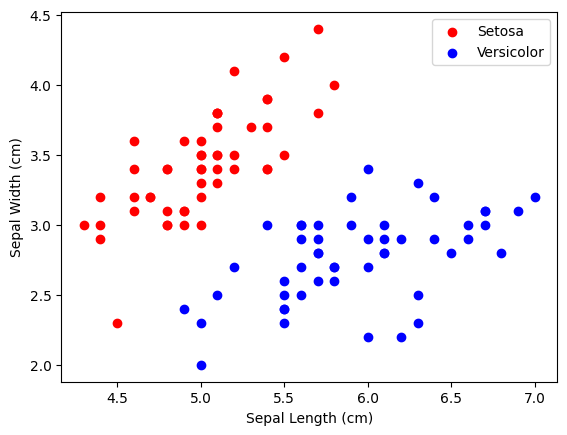

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_filtered[y_filtered == 0, 0],  # x-axis: sepal length (column 0) for class 0
            X_filtered[y_filtered == 0, 1],  # y-axis: sepal width (column 1) for class 0
            color='red', label='Setosa')

plt.scatter(X_filtered[y_filtered == 1, 0],  # x-axis: sepal length (column 0) for class 1
            X_filtered[y_filtered == 1, 1],  # y-axis: sepal width (column 1) for class 1
            color='blue', label='Versicolor')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)



In [ ]:
X=iris.data[:,:2] # Select all rows and the first two columns

# Extract the target labels
y = iris.target
# Filter out samples where the target is 2 (virginica)

filter_mask = y != 2  # Create a boolean mask where target is not 2
X_filtered = X[filter_mask]  # Apply the mask to the feature data
y_filtered = y[filter_mask]  # Apply the mask to the target labels

print(X_filtered.shape)

SVMmodel_1=SVC(kernel='linear',C=200)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_filtered,y_filtered,test_size=0.2)

SVMmodel_1.fit(X_train_1,y_train_1)
SVMmodel_1.score(X_test_1,y_test_1)

(100, 2)


1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[ 6.31475933 -5.26299283]
-17.311019873993807


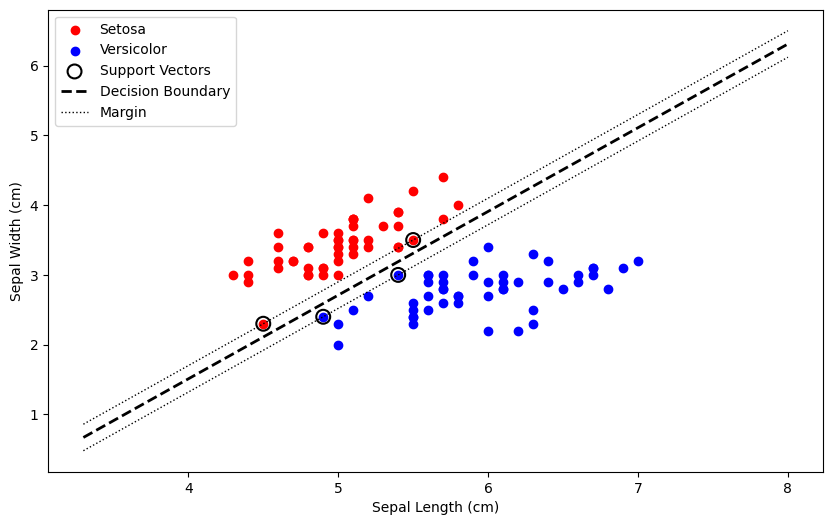

In [ ]:
# Get support vectors, coefficients, and intercept
support_vectors = SVMmodel_1.support_vectors_  # Support vectors
W = SVMmodel_1.coef_[0]                       # Weights [w0, w1]
b = SVMmodel_1.intercept_[0]                  # Bias term
print(W)
print(b)

plt.figure(figsize=(10, 6))
plt.scatter(X_filtered[y_filtered == 0, 0], X_filtered[y_filtered == 0, 1], color='red', label='Setosa')
plt.scatter(X_filtered[y_filtered == 1, 0], X_filtered[y_filtered == 1, 1], color='blue', label='Versicolor')

# Plot support vectors (highlighted)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='black', linewidths=1.5, label='Support Vectors')

# Plot decision boundary (W·x + b = 0)
x0 = np.linspace(X_filtered[:, 0].min() - 1, X_filtered[:, 0].max() + 1, 100)
x1_decision = (-W[0]/W[1]) * x0 - b/W[1]  # Solve W0*x0 + W1*x1 + b = 0 → x1 = (-W0/W1)*x0 - b/W1
plt.plot(x0, x1_decision, 'k--', linewidth=2, label='Decision Boundary')

# Plot margin lines (W·x + b = ±1)
x1_margin_upper = (-W[0]/W[1]) * x0 - (b - 1)/W[1]  # W·x + b = 1
x1_margin_lower = (-W[0]/W[1]) * x0 - (b + 1)/W[1]  # W·x + b = -1
plt.plot(x0, x1_margin_upper, 'k:', linewidth=1, label='Margin')
plt.plot(x0, x1_margin_lower, 'k:', linewidth=1)

# Add labels and legend
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

# Anomaly detection via SVM
Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

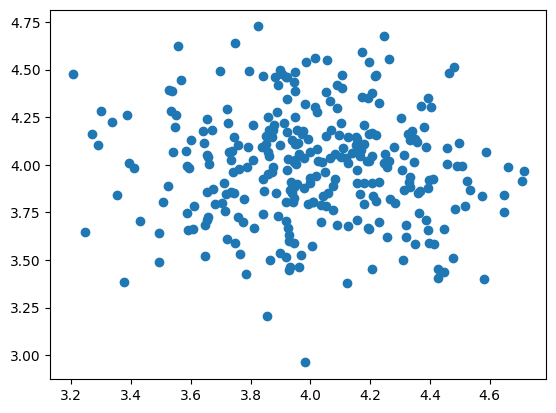

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

# Generate data (Gaussian blobs)
random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

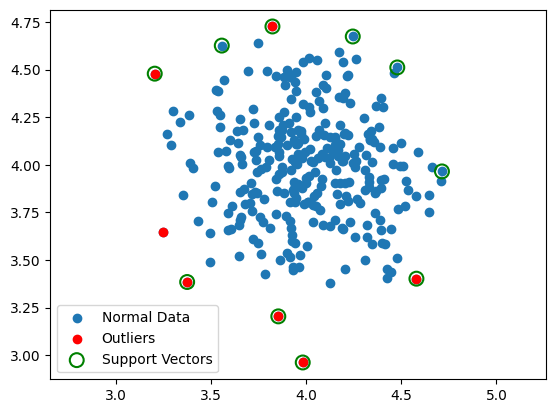

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()

Plot the support vectors:

In [ ]:
# Train one-class SVM and plot outliers + support vectors
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
SVMmodelOne.fit(x)

# Get predictions and support vectors
pred = SVMmodelOne.predict(x)
support_vectors = SVMmodelOne.support_vectors_  # Get support vectors

# Identify outliers (predicted as -1)
anom_index = where(pred==-1)
values = x[anom_index]

# Plot all points, outliers, and support vectors
plt.scatter(x[:,0], x[:,1],label='Normal Data')
plt.scatter(values[:,0], values[:,1], color='red',label='Outliers')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='green', linewidths=1.5, label='Support Vectors')

plt.axis('equal')
plt.axis('equal')
plt.legend()
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

Threshold: 8.987833799021839


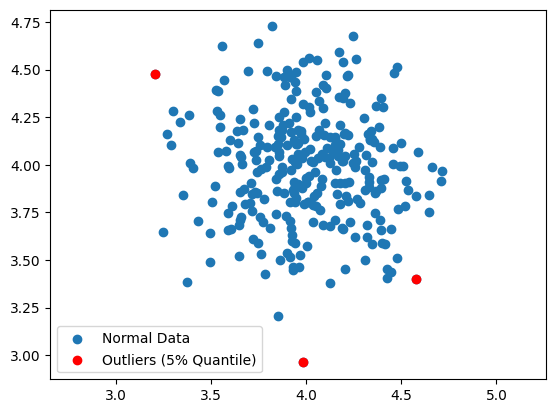

In [ ]:
# Calculate anomaly scores (lower scores = more anomalous)
scores = SVMmodelOne.score_samples(x)  # Scores are proportional to distance from decision boundary


# Define threshold using quantile (e.g., 5% outliers)
thresh = quantile(scores, 0.05) # Use 0.01 for 1%, 0.05 for 5%, etc.
print("Threshold:", thresh)

# Identify outliers (points with scores <= threshold)
index = where(scores<=thresh)
values = x[index]

# Plot results
plt.scatter(x[:, 0], x[:, 1], label='Normal Data')
plt.scatter(values[:, 0], values[:, 1], color='red', label='Outliers (5% Quantile)')
plt.axis('equal')
plt.legend()
plt.show()



